Диапазон L: min=14, max=211


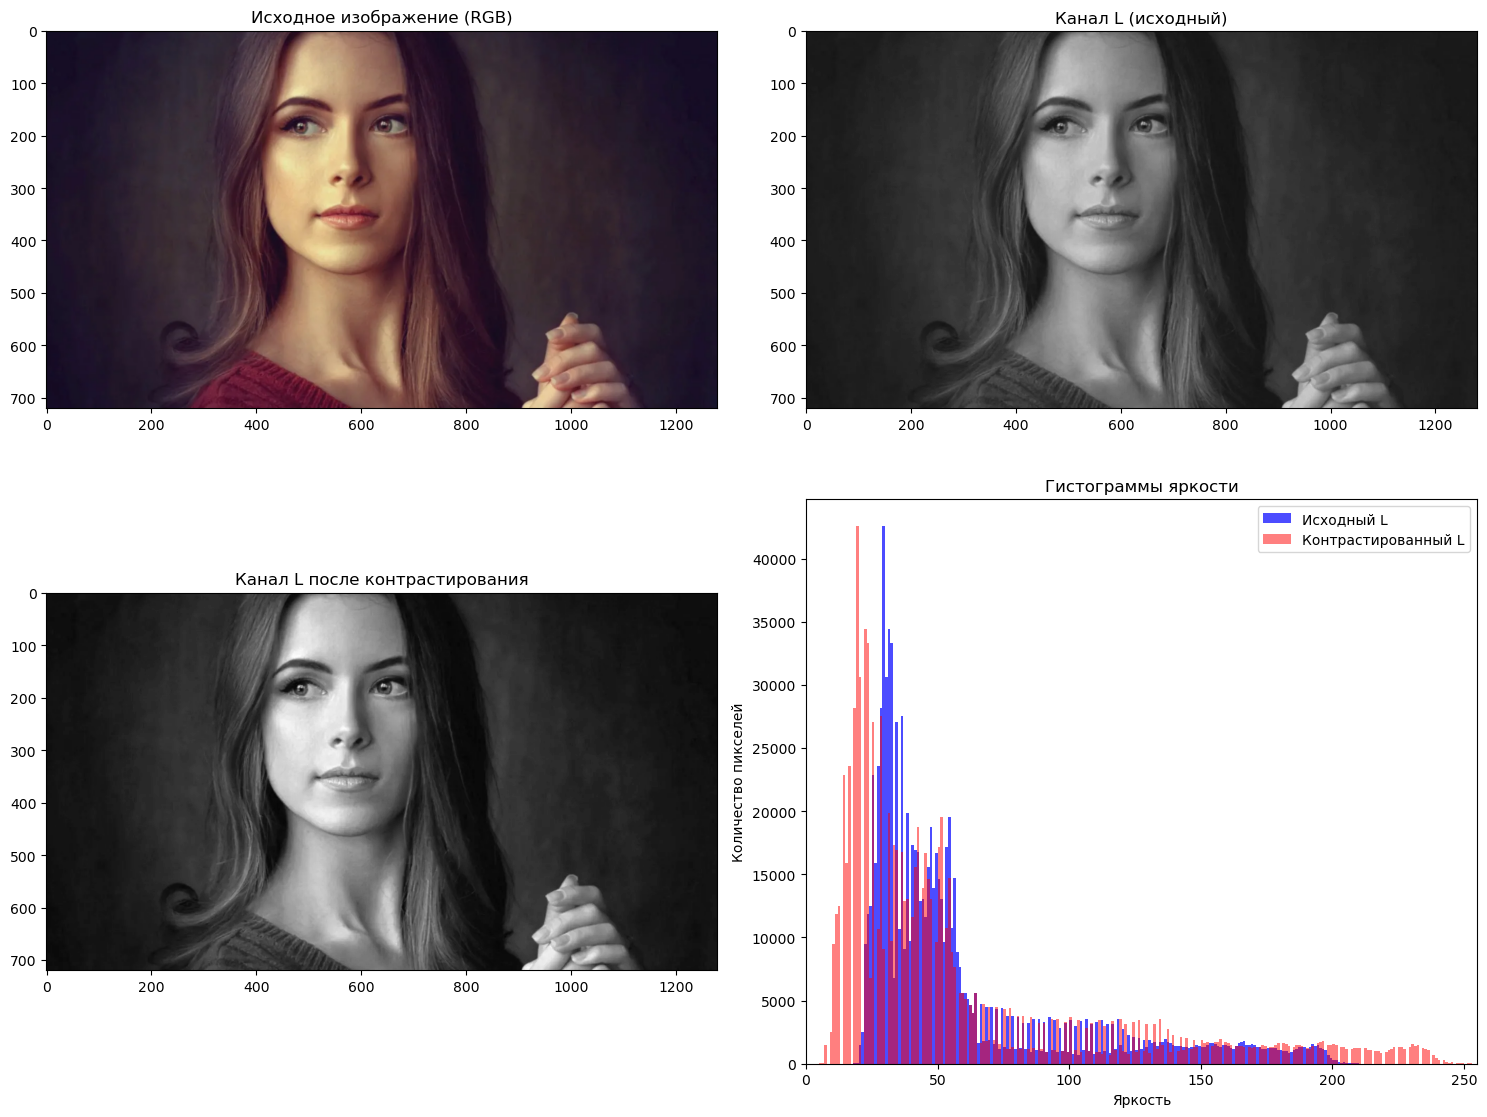

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


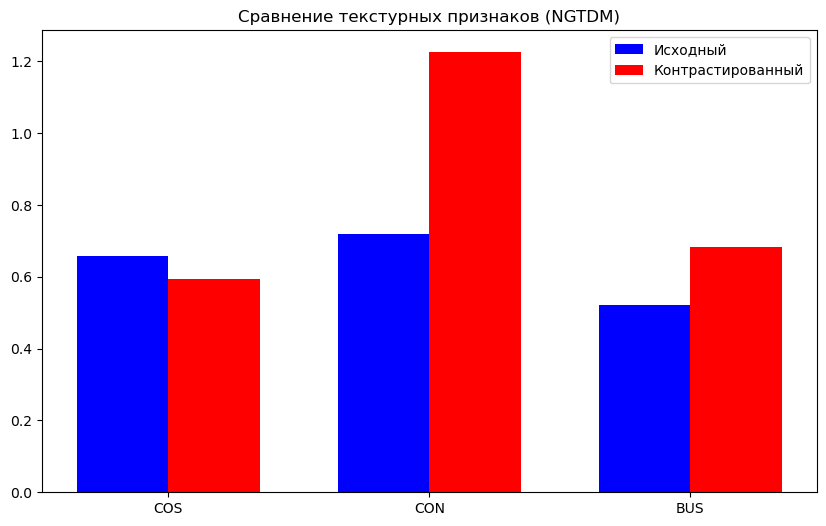

Текстурные признаки (NGTDM, d=1):
Исходное изображение → COS: 0.658, CON: 0.719, BUS: 0.520
Контрастированное   → COS: 0.594, CON: 1.225, BUS: 0.684


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('gugu3.jpg')  
if image is None:
    raise ValueError("Изображение не загружено")

hsl = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
H, L, S = cv2.split(hsl)

print(f"Диапазон L: min={L.min()}, max={L.max()}")

def linear_contrast_stretching(L):
    L_min, L_max = L.min(), L.max()
    L_contrast = ((L.astype(np.float32) - L_min) / (L_max - L_min)) * 255
    return L_contrast.astype(np.uint8)

L_contrast = linear_contrast_stretching(L)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))


axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Исходное изображение (RGB)')
axes[0, 1].imshow(L, cmap='gray', vmin=0, vmax=255)  
axes[0, 1].set_title('Канал L (исходный)')


axes[1, 0].imshow(L_contrast, cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title('Канал L после контрастирования')


axes[1, 1].hist(L.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7, label='Исходный L')
axes[1, 1].hist(L_contrast.ravel(), bins=256, range=(0, 256), color='red', alpha=0.5, label='Контрастированный L')
axes[1, 1].set_xlim(0, 255)  # Фиксируем ось X
axes[1, 1].set_xlabel('Яркость')
axes[1, 1].set_ylabel('Количество пикселей')
axes[1, 1].legend()
axes[1, 1].set_title('Гистограммы яркости')

plt.tight_layout()
plt.show()
def compute_ngtdm(image, d=1):
    padded = np.pad(image, d, mode='reflect')
    ngtdm = np.zeros_like(image, dtype=np.float32)
    
    for i in range(d, image.shape[0] + d):
        for j in range(d, image.shape[1] + d):
            neighborhood = padded[i-d:i+d+1, j-d:j+d+1]
            mean_neighbor = np.mean(neighborhood)
            ngtdm[i-d, j-d] = np.abs(padded[i, j] - mean_neighbor)
    
    return ngtdm

# Вычисляем NGTDM для исходного и контрастированного L
ngtdm_original = compute_ngtdm(L, d=1)
ngtdm_contrast = compute_ngtdm(L_contrast, d=1)

def ngtdm_features(ngtdm):
    # Coarseness (COS)
    COS = 1 / (1 + np.mean(ngtdm))
    
    # Contrast (CON)
    CON = np.var(ngtdm)
    
    # Busyness (BUS)
    BUS = np.sum(ngtdm) / (ngtdm.size)
    
    return COS, CON, BUS

# Признаки для исходного и контрастированного изображения
COS_orig, CON_orig, BUS_orig = ngtdm_features(ngtdm_original)
COS_contr, CON_contr, BUS_contr = ngtdm_features(ngtdm_contrast)

print(ngtdm_original)
print(ngtdm_contrast)
# Столбчатая диаграмма признаков
features = ['COS', 'CON', 'BUS']
original_values = [COS_orig, CON_orig, BUS_orig]
contrast_values = [COS_contr, CON_contr, BUS_contr]

x = np.arange(len(features))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, original_values, width, label='Исходный', color='blue')
rects2 = ax.bar(x + width/2, contrast_values, width, label='Контрастированный', color='red')

ax.set_xticks(x)
ax.set_xticklabels(features)
ax.legend()
ax.set_title('Сравнение текстурных признаков (NGTDM)')
plt.show()
print("Текстурные признаки (NGTDM, d=1):")
print(f"Исходное изображение → COS: {COS_orig:.3f}, CON: {CON_orig:.3f}, BUS: {BUS_orig:.3f}")
print(f"Контрастированное   → COS: {COS_contr:.3f}, CON: {CON_contr:.3f}, BUS: {BUS_contr:.3f}")

Диапазон L: min=2, max=235


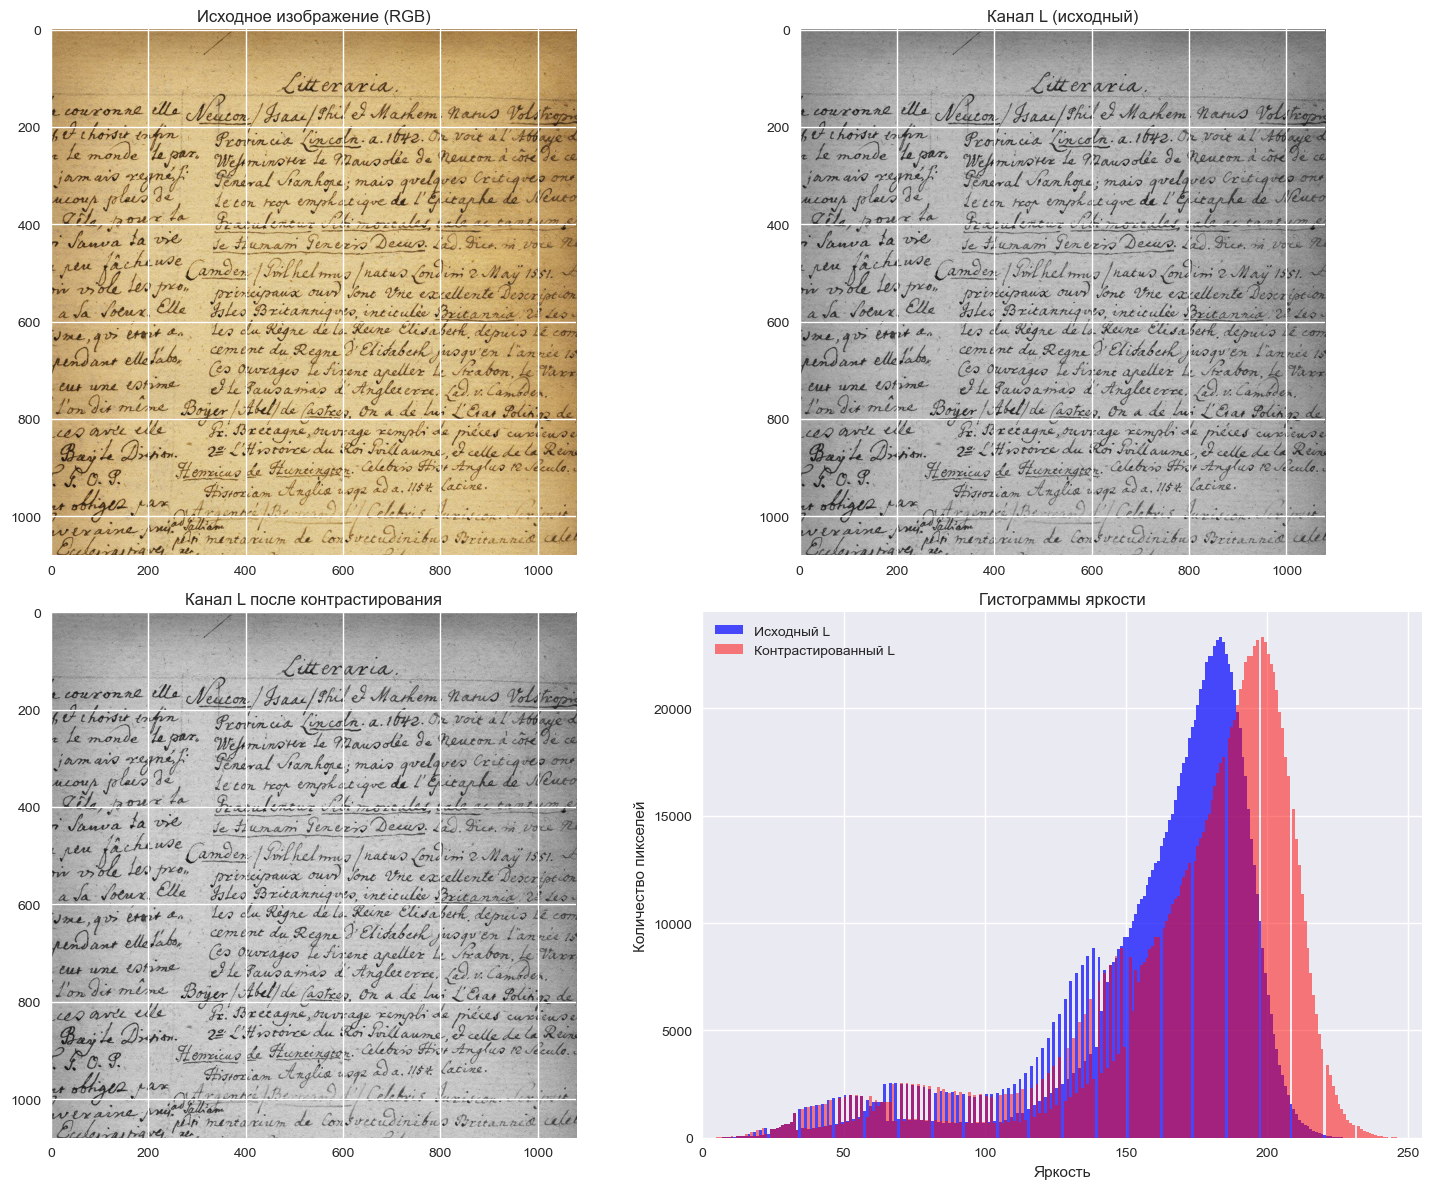

In [114]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('gugu.jpg')  
if image is None:
    raise ValueError("Изображение не загружено")

hsl = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
H, L, S = cv2.split(hsl)

print(f"Диапазон L: min={L.min()}, max={L.max()}")

def linear_contrast_stretching(L):
    L_min, L_max = L.min(), L.max()
    L_contrast = ((L.astype(np.float32) - L_min) / (L_max - L_min)) * 255
    return L_contrast.astype(np.uint8)

L_contrast = linear_contrast_stretching(L)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))


axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Исходное изображение (RGB)')
axes[0, 1].imshow(L, cmap='gray', vmin=0, vmax=255)  
axes[0, 1].set_title('Канал L (исходный)')


axes[1, 0].imshow(L_contrast, cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title('Канал L после контрастирования')


axes[1, 1].hist(L.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7, label='Исходный L')
axes[1, 1].hist(L_contrast.ravel(), bins=256, range=(0, 256), color='red', alpha=0.5, label='Контрастированный L')
axes[1, 1].set_xlim(0, 255)  # Фиксируем ось X
axes[1, 1].set_xlabel('Яркость')
axes[1, 1].set_ylabel('Количество пикселей')
axes[1, 1].legend()
axes[1, 1].set_title('Гистограммы яркости')

plt.tight_layout()
plt.show()

In [124]:
def compute_ngtdm(image, d=1):
    padded = np.pad(image, d, mode='reflect')
    ngtdm = np.zeros_like(image, dtype=np.float32)
    
    for i in range(d, image.shape[0] + d):
        for j in range(d, image.shape[1] + d):
            neighborhood = padded[i-d:i+d+1, j-d:j+d+1]
            mean_neighbor = np.mean(neighborhood)
            ngtdm[i-d, j-d] = np.abs(padded[i, j] - mean_neighbor)
    
    return ngtdm

# Вычисляем NGTDM для исходного и контрастированного L
ngtdm_original = compute_ngtdm(L, d=1)
ngtdm_contrast = compute_ngtdm(L_contrast, d=1)

In [125]:
def ngtdm_features(ngtdm):
    # Coarseness (COS)
    COS = 1 / (1 + np.mean(ngtdm))
    
    # Contrast (CON)
    CON = np.var(ngtdm)
    
    # Busyness (BUS)
    BUS = np.sum(ngtdm) / (ngtdm.size)
    
    return COS, CON, BUS

# Признаки для исходного и контрастированного изображения
COS_orig, CON_orig, BUS_orig = ngtdm_features(ngtdm_original)
COS_contr, CON_contr, BUS_contr = ngtdm_features(ngtdm_contrast)


[[ 0.22222222  5.7777777   5.5555553  ...  8.444445    5.5555553
   8.444445  ]
 [10.777778   10.111111    3.7777777  ...  6.888889    5.3333335
   6.        ]
 [ 4.7777777   6.          4.4444447  ...  2.2222223   8.
   9.777778  ]
 ...
 [ 9.777778    4.4444447   9.111111   ...  5.111111    9.888889
   9.555555  ]
 [ 1.3333334   1.         10.         ...  6.5555553   3.5555556
   5.6666665 ]
 [ 6.888889   16.444445    8.         ...  7.         17.
   6.888889  ]]
[[ 0.         6.111111   6.        ...  9.222222   6.111111   9.111111 ]
 [11.777778  11.555555   4.3333335 ...  7.3333335  6.         6.5555553]
 [ 5.4444447  6.6666665  5.        ...  2.2222223  9.111111  11.111111 ]
 ...
 [10.555555   4.4444447 10.222222  ...  5.4444447 10.888889  10.777778 ]
 [ 1.6666666  1.3333334 11.222222  ...  7.5555553  3.8888888  6.2222223]
 [ 7.5555553 18.11111    8.888889  ...  8.111111  18.666666   7.5555553]]


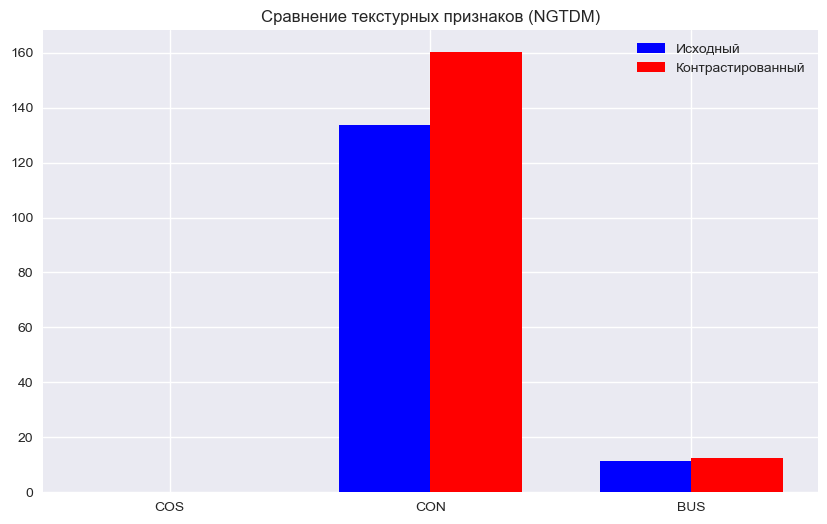

In [140]:

print(ngtdm_original)
print(ngtdm_contrast)
# Столбчатая диаграмма признаков
features = ['COS', 'CON', 'BUS']
original_values = [COS_orig, CON_orig, BUS_orig]
contrast_values = [COS_contr, CON_contr, BUS_contr]

x = np.arange(len(features))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, original_values, width, label='Исходный', color='blue')
rects2 = ax.bar(x + width/2, contrast_values, width, label='Контрастированный', color='red')

ax.set_xticks(x)
ax.set_xticklabels(features)
ax.legend()
ax.set_title('Сравнение текстурных признаков (NGTDM)')
plt.show()

In [130]:
print("Текстурные признаки (NGTDM, d=1):")
print(f"Исходное изображение → COS: {COS_orig:.3f}, CON: {CON_orig:.3f}, BUS: {BUS_orig:.3f}")
print(f"Контрастированное   → COS: {COS_contr:.3f}, CON: {CON_contr:.3f}, BUS: {BUS_contr:.3f}")

Текстурные признаки (NGTDM, d=1):
Исходное изображение → COS: 0.080, CON: 133.721, BUS: 11.528
Контрастированное   → COS: 0.073, CON: 160.133, BUS: 12.619


Диапазон L: min=0, max=247


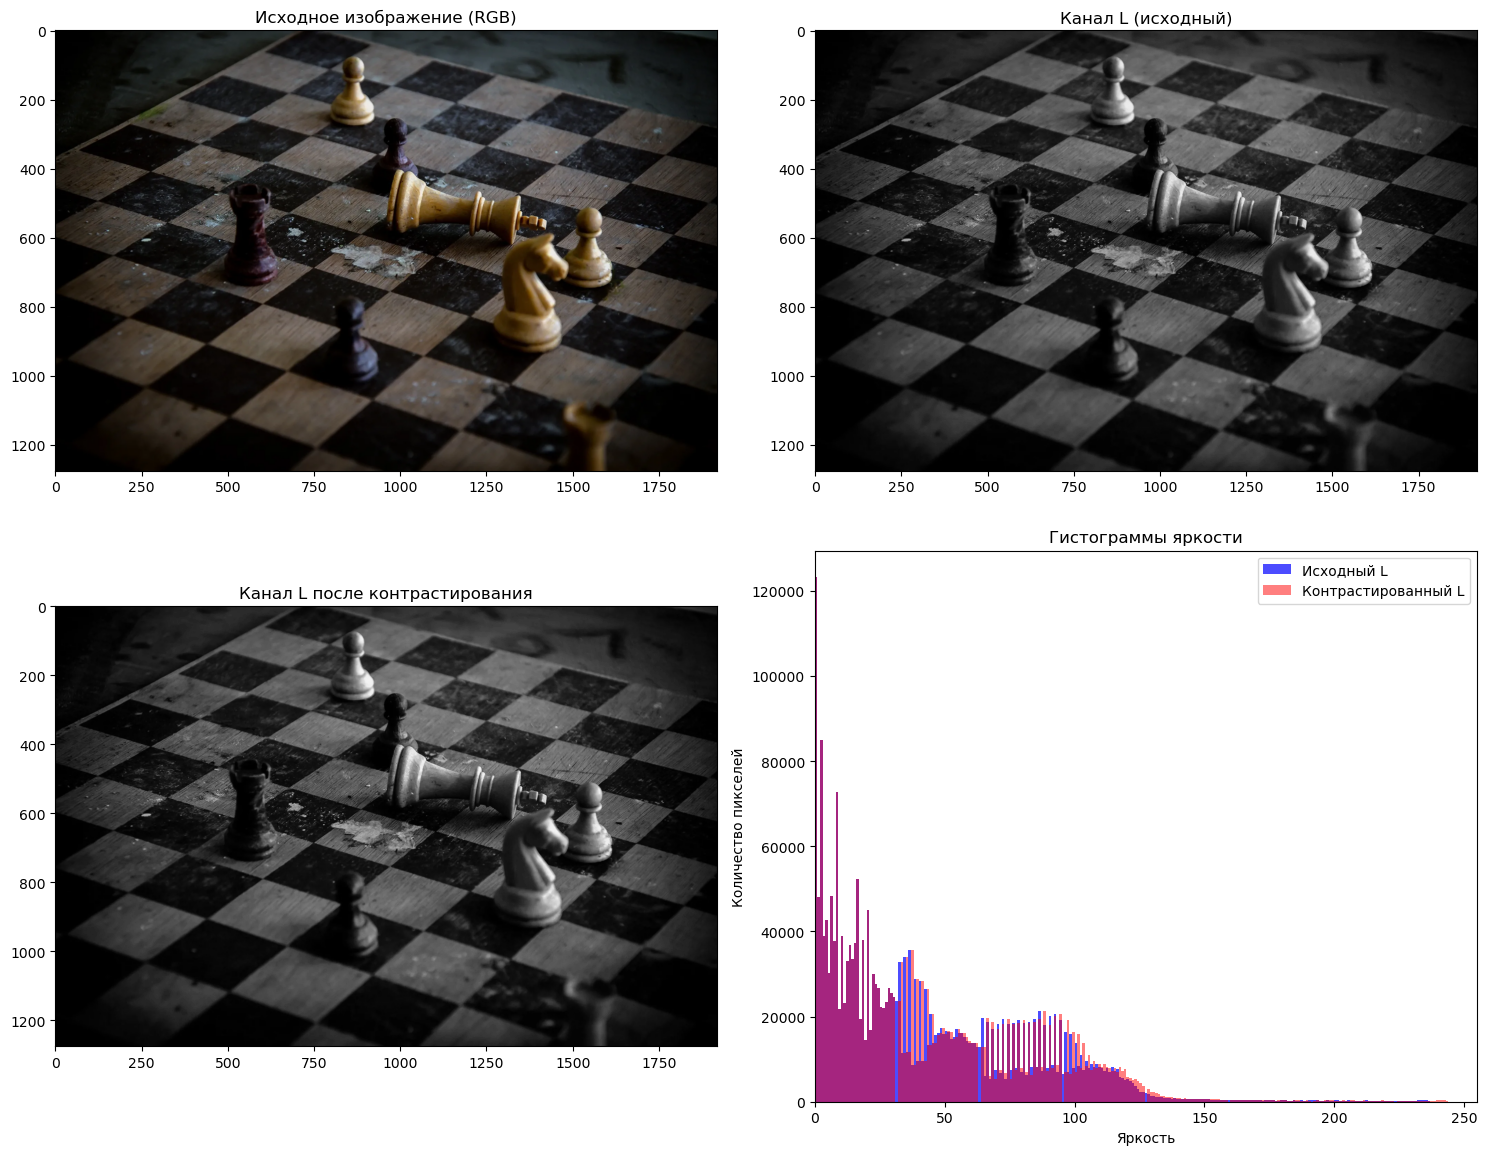

[[0.         0.22222222 1.5555556  ... 0.         0.         0.        ]
 [0.         0.22222222 0.22222222 ... 0.         0.         0.        ]
 [0.6666667  0.6666667  0.8888889  ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.         0.22222222 1.5555556  ... 0.         0.         0.        ]
 [0.         0.22222222 0.22222222 ... 0.         0.         0.        ]
 [0.6666667  0.6666667  0.8888889  ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


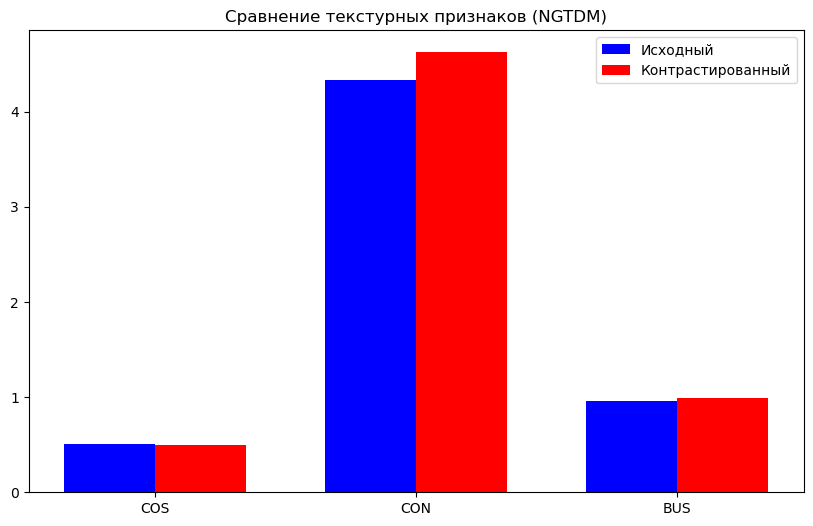

Текстурные признаки (NGTDM, d=1):
Исходное изображение → COS: 0.509, CON: 4.333, BUS: 0.964
Контрастированное   → COS: 0.501, CON: 4.624, BUS: 0.995


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('gugu2.jpg')  
if image is None:
    raise ValueError("Изображение не загружено")

hsl = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
H, L, S = cv2.split(hsl)

print(f"Диапазон L: min={L.min()}, max={L.max()}")

def linear_contrast_stretching(L):
    L_min, L_max = L.min(), L.max()
    L_contrast = ((L.astype(np.float32) - L_min) / (L_max - L_min)) * 255
    return L_contrast.astype(np.uint8)

L_contrast = linear_contrast_stretching(L)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))


axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Исходное изображение (RGB)')
axes[0, 1].imshow(L, cmap='gray', vmin=0, vmax=255)  
axes[0, 1].set_title('Канал L (исходный)')


axes[1, 0].imshow(L_contrast, cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title('Канал L после контрастирования')


axes[1, 1].hist(L.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7, label='Исходный L')
axes[1, 1].hist(L_contrast.ravel(), bins=256, range=(0, 256), color='red', alpha=0.5, label='Контрастированный L')
axes[1, 1].set_xlim(0, 255)  # Фиксируем ось X
axes[1, 1].set_xlabel('Яркость')
axes[1, 1].set_ylabel('Количество пикселей')
axes[1, 1].legend()
axes[1, 1].set_title('Гистограммы яркости')

plt.tight_layout()
plt.show()
def compute_ngtdm(image, d=1):
    padded = np.pad(image, d, mode='reflect')
    ngtdm = np.zeros_like(image, dtype=np.float32)
    
    for i in range(d, image.shape[0] + d):
        for j in range(d, image.shape[1] + d):
            neighborhood = padded[i-d:i+d+1, j-d:j+d+1]
            mean_neighbor = np.mean(neighborhood)
            ngtdm[i-d, j-d] = np.abs(padded[i, j] - mean_neighbor)
    
    return ngtdm

# Вычисляем NGTDM для исходного и контрастированного L
ngtdm_original = compute_ngtdm(L, d=1)
ngtdm_contrast = compute_ngtdm(L_contrast, d=1)

def ngtdm_features(ngtdm):
    # Coarseness (COS)
    COS = 1 / (1 + np.mean(ngtdm))
    
    # Contrast (CON)
    CON = np.var(ngtdm)
    
    # Busyness (BUS)
    BUS = np.sum(ngtdm) / (ngtdm.size)
    
    return COS, CON, BUS

# Признаки для исходного и контрастированного изображения
COS_orig, CON_orig, BUS_orig = ngtdm_features(ngtdm_original)
COS_contr, CON_contr, BUS_contr = ngtdm_features(ngtdm_contrast)

print(ngtdm_original)
print(ngtdm_contrast)
# Столбчатая диаграмма признаков
features = ['COS', 'CON', 'BUS']
original_values = [COS_orig, CON_orig, BUS_orig]
contrast_values = [COS_contr, CON_contr, BUS_contr]

x = np.arange(len(features))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, original_values, width, label='Исходный', color='blue')
rects2 = ax.bar(x + width/2, contrast_values, width, label='Контрастированный', color='red')

ax.set_xticks(x)
ax.set_xticklabels(features)
ax.legend()
ax.set_title('Сравнение текстурных признаков (NGTDM)')
plt.show()
print("Текстурные признаки (NGTDM, d=1):")
print(f"Исходное изображение → COS: {COS_orig:.3f}, CON: {CON_orig:.3f}, BUS: {BUS_orig:.3f}")
print(f"Контрастированное   → COS: {COS_contr:.3f}, CON: {CON_contr:.3f}, BUS: {BUS_contr:.3f}")